In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Base-Model PhysioNet

### Training Curve

In [2]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/leave_subjects_out/test_physio_34_10_65_90_101/2023-04-25_16-09-09_correctedBug/hist.pkl"
with open(path, 'rb') as file:
    history = pickle.load(file)

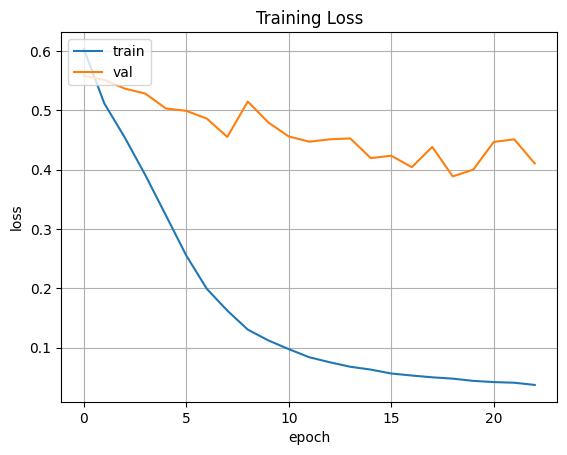

In [3]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

### Confusion Matrix

In [4]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/leave_subjects_out/test_physio_34_10_65_90_101/2023-04-25_16-09-09_correctedBug/confusion_matrix_2023-04-25_16-09-09.pkl"
with open(path, 'rb') as file:
    cm = pickle.load(file)

In [5]:
cm

{'TN': 597, 'FP': 68, 'FN': 99, 'TP': 552}

### Classification Report

In [6]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/leave_subjects_out/test_physio_34_10_65_90_101/classification_report_2023-04-25_16-09-09.pkl"
with open(path, 'rb') as file:
    cr = pickle.load(file)

In [7]:
print(cr)

              precision    recall  f1-score   support

           L       0.86      0.90      0.88       665
           R       0.89      0.85      0.87       651

    accuracy                           0.87      1316
   macro avg       0.87      0.87      0.87      1316
weighted avg       0.87      0.87      0.87      1316



# Fine Tuning: PhysioNet

In [8]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_08-44-51.pkl"

In [9]:
with open(path, 'rb') as file:
    test_acc = pickle.load(file)

In [10]:
test_subjects = list(test_acc.keys())

In [11]:
test_acc[test_subjects[0]]['NotTuned']

[0.5925925970077515,
 0.6666666865348816,
 0.5384615659713745,
 0.5384615659713745,
 0.7307692170143127]

## Without finetuning

In [12]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies before Finetuning:

Subject 34: 0.613390326499939
Subject 10: 0.5037037074565888
Subject 65: 0.7122507214546203
Subject 90: 0.6518518447875976
Subject 101: 0.7339031338691712


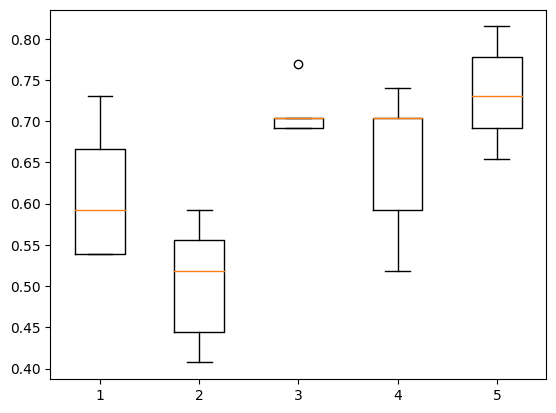

In [13]:
plt.boxplot(data_subjects)
plt.show()

## With finetuning

In [14]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies after Finetuning:

Subject 34: 0.7871794819831848
Subject 10: 0.9259259223937988
Subject 65: 0.9008546948432923
Subject 90: 0.9555555582046509
Subject 101: 0.8715099811553955


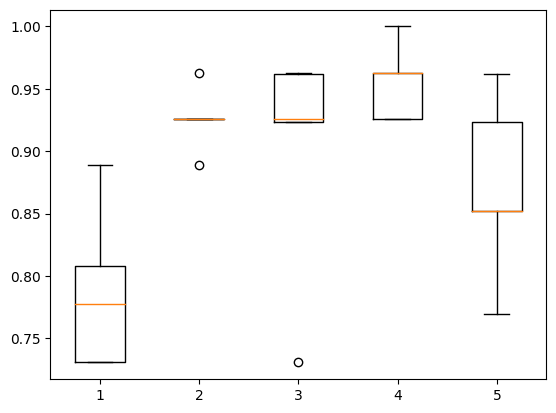

In [15]:
plt.boxplot(data_subjects)
plt.show()

# Fine Tuning: Own data on PhysioNet-Basemodel

In [16]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_09-49-59.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)

In [17]:
test_subjects = list(test_acc.keys())

In [18]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies before Finetuning:

Subject dani: 0.49722222089767454
Subject ivo: 0.47777777910232544
Subject pablo: 0.5414889454841614
Subject huiyu: 0.5265384674072265
Subject manu: 0.528644061088562
Subject fabio: 0.5638888835906982
Subject anna: 0.5111111164093017
Subject luisa: 0.46111111640930175
Subject sarah: 0.5041471064090729
Subject irene: 0.4255191206932068
Subject jan: 0.5233589053153992


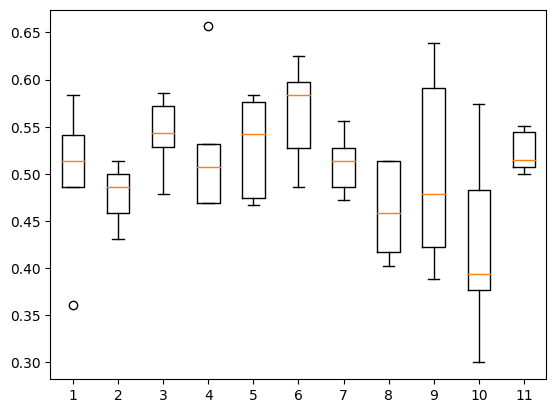

In [19]:
plt.boxplot(data_subjects)
plt.show()

In [20]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies after Finetuning:

Subject dani: 0.75
Subject ivo: 0.5916666626930237
Subject pablo: 0.7321529150009155
Subject huiyu: 0.7167307734489441
Subject manu: 0.599435031414032
Subject fabio: 0.675
Subject anna: 0.9194444298744202
Subject luisa: 0.9499999761581421
Subject sarah: 0.8627151727676392
Subject irene: 0.4944808602333069
Subject jan: 0.5320119321346283


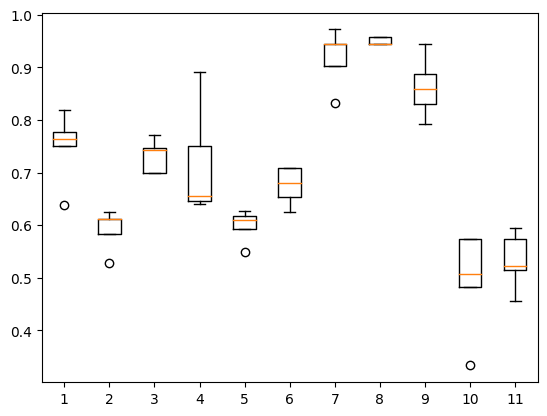

In [21]:
plt.boxplot(data_subjects)
plt.show()

# Fine Tuning: Own data on own base-model
## 3 channels

In [22]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/mydataset_base/correctedBug/test_accuracies_2023-04-27_12-58-42.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

In [23]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies before Finetuning:

Subject dani: 0.43611111044883727
Subject ivo: 0.46111111640930175
Subject pablo: 0.47014084458351135
Subject huiyu: 0.4953365385532379
Subject manu: 0.4748587548732758
Subject fabio: 0.5416666626930237
Subject anna: 0.5277777731418609
Subject luisa: 0.5027777671813964
Subject sarah: 0.4760172128677368
Subject irene: 0.4683060050010681
Subject jan: 0.4823103129863739


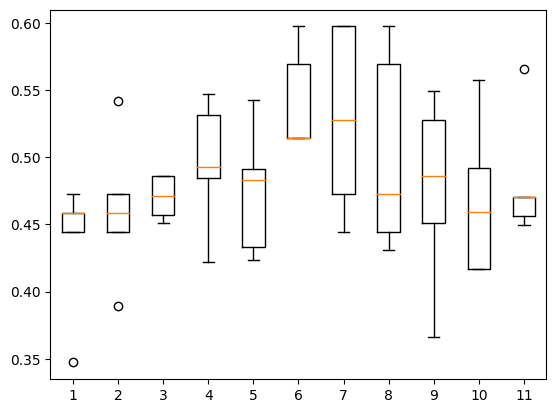

In [24]:
plt.boxplot(data_subjects)
plt.show()

In [25]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies after Finetuning:

Subject dani: 0.6916666567325592
Subject ivo: 0.5999999880790711
Subject pablo: 0.6865593671798706
Subject huiyu: 0.6169230818748475
Subject manu: 0.55559321641922
Subject fabio: 0.625
Subject anna: 0.7694444417953491
Subject luisa: 0.8861111164093017
Subject sarah: 0.7562206506729126
Subject irene: 0.48163933753967286
Subject jan: 0.5905797123908997


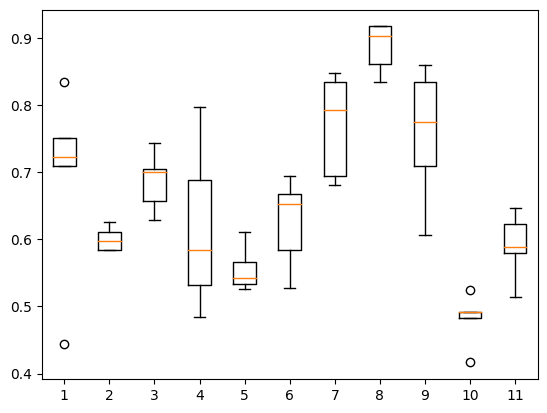

In [26]:
plt.boxplot(data_subjects)
plt.show()

# Fine Tuning: Own data on own base-model
## 6 channels

In [28]:
 path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_6_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_22-48-56.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

Average Test Accuracies before Finetuning:

Subject dani: 0.5055555582046509
Subject ivo: 0.5319444417953492
Subject pablo: 0.47721378207206727
Subject huiyu: 0.4985828518867493
Subject manu: 0.5370460212230682
Subject fabio: 0.5458333432674408
Subject anna: 0.5263888895511627
Subject luisa: 0.4180555582046509
Subject sarah: 0.5111691057682037
Subject irene: 0.48674975633621215
Subject jan: 0.5189029633998871


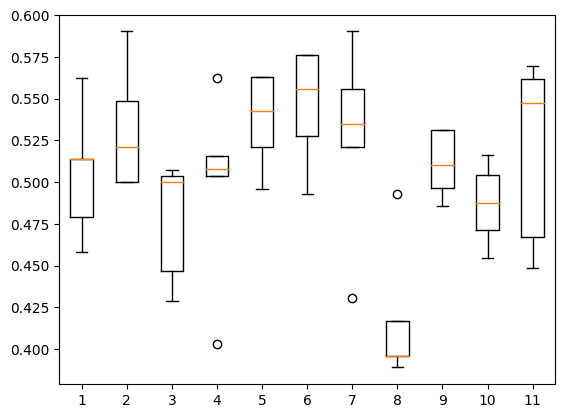

In [29]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")
    
plt.boxplot(data_subjects)
plt.show()

Average Test Accuracies after Finetuning:

Subject dani: 0.9097222328186035
Subject ivo: 0.8513888955116272
Subject pablo: 0.9373353481292724
Subject huiyu: 0.8987766385078431
Subject manu: 0.8737501859664917
Subject fabio: 0.9097222089767456
Subject anna: 0.9763888835906982
Subject luisa: 0.9972222208976745
Subject sarah: 0.9565941095352173
Subject irene: 0.8266630411148072
Subject jan: 0.8728638768196106


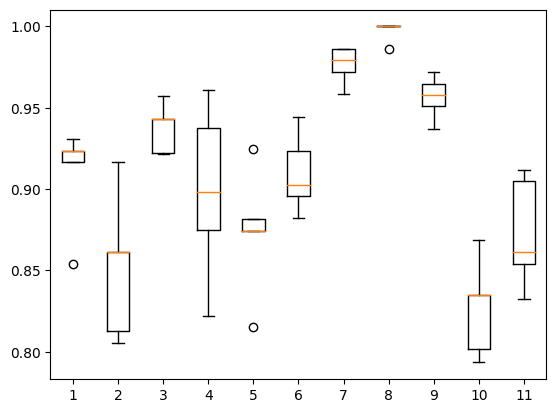

In [30]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

plt.boxplot(data_subjects)
plt.show()